<a href="https://colab.research.google.com/github/jagvgithub/JJ-Models/blob/main/Modelos_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
from pycaret.datasets import get_data
dataset = get_data('credit')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 M

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
dataset.shape

(24000, 24)

In [ ]:
data=dataset.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamitno
data_unusen =dataset.drop(data.index).reset_index(drop=True) # testeo


In [ ]:
print(data.shape,data_unusen.shape)

(18000, 24) (6000, 24)


In [ ]:
from pycaret.classification import * # la data ya tiene una marcacion de  01

exp_clf101 = setup(data=data,target='default',session_id=10001)  # RESUMEN DE LA VARIABLES

,Description,Value
0,Session id,10001
1,Target,default
2,Target type,Binary
3,Original data shape,"(18000, 24)"
4,Transformed data shape,"(18000, 24)"
5,Transformed train set shape,"(12600, 24)"
6,Transformed test set shape,"(5400, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8202,0.7747,0.3668,0.6783,0.4757,0.3787,0.4050,4.6310
ada,Ada Boost Classifier,0.8179,0.7633,0.3387,0.6856,0.4529,0.3584,0.3908,1.1050
lightgbm,Light Gradient Boosting Machine,0.8175,0.7694,0.3668,0.6631,0.4718,0.3726,0.3966,3.0000
rf,Random Forest Classifier,0.8140,0.7551,0.3700,0.6433,0.4695,0.3668,0.3875,3.5640
lda,Linear Discriminant Analysis,0.8126,0.7195,0.2696,0.7102,0.3903,0.3053,0.3557,0.1160
et,Extra Trees Classifier,0.8087,0.7489,0.3668,0.6190,0.4605,0.3535,0.3714,1.6620
xgboost,Extreme Gradient Boosting,0.8085,0.7499,0.3711,0.6159,0.4627,0.3550,0.3720,0.4620
lr,Logistic Regression,0.8026,0.7091,0.2116,0.6877,0.3212,0.2427,0.3013,1.5930
ridge,Ridge Classifier,0.7989,0.7195,0.1528,0.7358,0.2526,0.1907,0.2710,0.0530
dummy,Dummy Classifier,0.7771,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8310,0.7879,0.4321,0.6914,0.5319,0.4353,0.4533
1,0.8262,0.7585,0.4036,0.6848,0.5079,0.4108,0.4320
2,0.8222,0.7609,0.3950,0.6727,0.4978,0.3985,0.4194
3,0.7921,0.7272,0.3203,0.5590,0.4072,0.2923,0.3089
4,0.8024,0.7518,0.3310,0.6039,0.4276,0.3202,0.3414
5,0.8087,0.7433,0.3594,0.6235,0.4560,0.3500,0.3695
6,0.8214,0.7711,0.4093,0.6609,0.5055,0.4038,0.4211
7,0.8056,0.7576,0.3310,0.6200,0.4316,0.3271,0.3506
8,0.8175,0.7567,0.3594,0.6689,0.4676,0.3693,0.3952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=10001, verbose=0,
                       warm_start=False)


In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8206,0.7431,0.3286,0.7077,0.4488,0.3584,0.3961
1,0.8286,0.7388,0.4036,0.6975,0.5113,0.4162,0.4391
2,0.8262,0.7322,0.3665,0.7153,0.4847,0.3930,0.4248
3,0.8056,0.6967,0.2740,0.6525,0.3860,0.2927,0.3317
4,0.8167,0.7049,0.3381,0.6786,0.4513,0.3557,0.3869
5,0.8214,0.7306,0.3701,0.6842,0.4804,0.3839,0.4104
6,0.8246,0.7548,0.4199,0.6705,0.5164,0.4161,0.4331
7,0.8151,0.7193,0.3488,0.6622,0.4569,0.3581,0.3849
8,0.8214,0.7407,0.3630,0.6892,0.4755,0.3801,0.4086


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=3, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=180, n_jobs=-1,
                       oob_score=False, random_state=10001, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'parameter'), ('AUC', 'auc'), ('Confusion Matrix', 'confusion_matrix'), ('Threshold', 'threshold'), ('Precision Recall', 'pr'), ('Prediction Error', 'error'), ('Class Report', 'class_report'), ('Feature Selection', 'rfe'), ('Learning Curve', 'learning'), ('Manifold Learning', 'manifold'), ('Calibration Curve', 'calibration'), ('Validation Curve', 'vc'), ('Dimensions', 'dimension'), ('Feature Importance', 'feature'), ('Feature Importance (All)', 'feature_all'), ('Decision Boundary', 'boundary'), ('Lift Chart', 'lift'), ('Gain Chart', 'gain'), ('Decision Tree', 'tree'), ('KS Statistic Plot', 'ks')), value='parameter'), Output()), _dom_classes=('widget-interact',))

In [ ]:
help(plot_model) # validacion visual

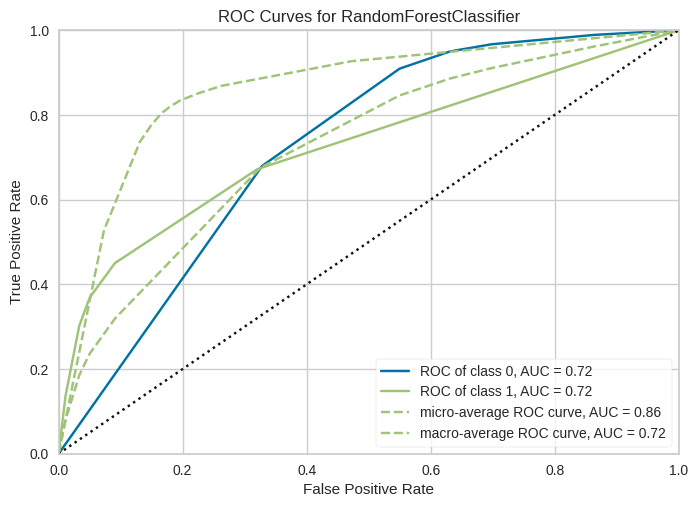

In [ ]:
plot_model(tuned_rf,plot='auc')

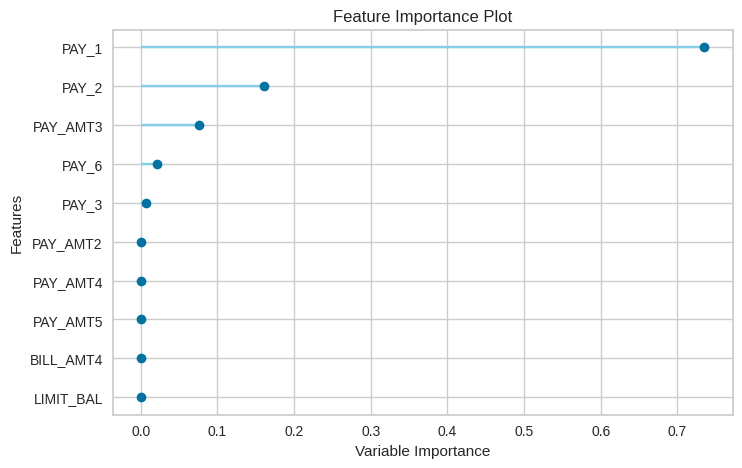

In [ ]:
# feature importance
plot_model(tuned_rf,plot='feature')

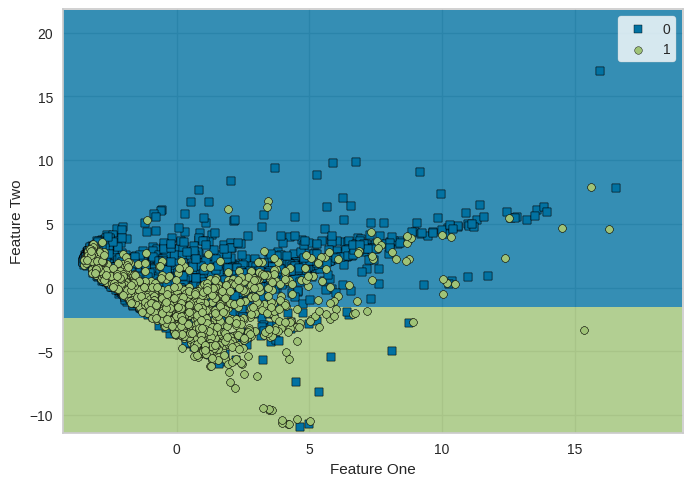

In [ ]:
## Decision Boundary
plot_model(tuned_rf, plot = 'boundary')

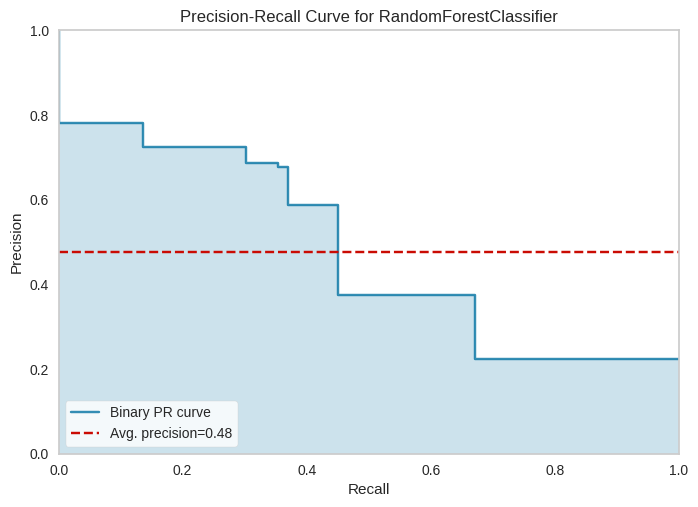

In [ ]:
# Precision Recall Curve
plot_model(tuned_rf, plot = 'pr')

KeyboardInterrupt: 

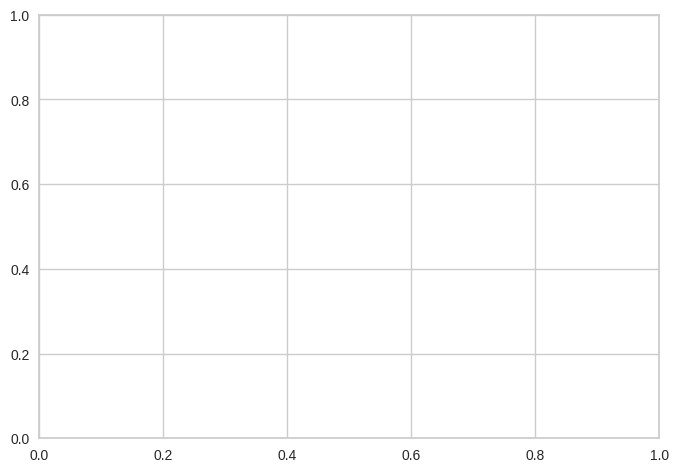

In [ ]:
# Validation Curve
plot_model(tuned_rf, plot = 'vc')

In [ ]:
predicciones = predict_model(tuned_rf,data=data_unusen)
predicciones.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8390,0.7482,0.3572,0.7138,0.4761,0.3932,0.4262


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,420000,2,1,2,34,-1,-1,-1,0,0,...,40060.0,8967.0,33661.0,3005.0,3000.0,40060.0,5000.0,0,0,0.8844
1,180000,2,1,1,35,-1,-1,-1,2,-1,...,148.0,0.0,1000.0,0.0,2000.0,0.0,5000.0,0,0,0.7818
2,50000,2,3,1,35,3,2,2,2,0,...,29719.0,0.0,3511.0,0.0,1045.0,1066.0,1134.0,0,1,0.6815
3,120000,2,1,1,34,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7818
4,80000,2,3,1,35,0,0,0,0,0,...,45086.0,1966.0,2055.0,1720.0,1458.0,1475.0,1587.0,0,0,0.8844


In [ ]:
# modelo final entrenado con todo el conjunto de datos

final_rf=finalize_model(tuned_rf)
print(final_rf)


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
            

In [ ]:
save_model(final_rf,'ModeloProduccion')